In [2]:
from plotting_routines import generate_filename_fRG, change_prefix, plot_fRG, plot_fRG_V_runs, generate_label
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py


path_fRG = "C:/Users/aguir/Documents/Data_Thesis_Local/"
path_NRG = path_fRG

ea = "error_analysis_"
PC = "parquet_check_"

In [ ]:
def add_PC_to(labels):
    PC_labels = []
    for label in labels:
        s = list(label)
        s.insert(1, '\mathrm{PC}_{')
        s.insert(-1, '}')
        PC_labels.append("".join(s))
        
    return PC_labels

In [ ]:
Volt = 0.0
Temp = 0.01

K1    = generate_filename_fRG(path_fRG, 1,1, V=Volt)
K1_sf = generate_filename_fRG(path_fRG, 1,1, sf=True, V=Volt)
K2_1L = generate_filename_fRG(path_fRG, 2,1, V=Volt)
K2_2L = generate_filename_fRG(path_fRG, 2,2, V=Volt)

K1_PC    = change_prefix(path_fRG, PC, K1)
K2_1L_PC = change_prefix(path_fRG, PC, K2_1L)
K2_2L_PC = change_prefix(path_fRG, PC, K2_2L)

U_list = [0.1, 2, 2.5] #[0.1, 0.5, 1, 1.5, 2, 2.5]
typ_list = ["self"] #, "K1a", "K1p", "K1t"]] susc_sp, susc_ch, A

comp = ['R', 'K']

for typ in typ_list:
    if typ == 'A':
        nK=1
    else:
        nK=2
    
    for iK in range(nK):

        if (typ == 'self' and iK == 0) or (typ == 'A'):
            ins = True
        else:
            ins = False
        
        for U_NRG in U_list:
    
            filenames = [K1, K1_sf, K2_1L]
            PC_filenames = [K1_PC, K2_1L_PC]
            if U_NRG != 3:
                filenames.append(K2_2L)
                #PC_filenames.append(K2_2L_PC)

            labels = generate_label(path_fRG, filenames)
            #PC_labels = add_PC_to(generate_label(PC_filenames))

            #filenames += PC_filenames
            #labels += PC_labels



            NRG_info = [U_NRG, path_NRG, (Temp==0.01 and Volt==0)]
            fig, ax = plot_fRG(typ, iK, filenames, labels, NRG_info, inset=ins)

            Delta = 0.5

            plt.show()

            figname = typ
            if typ != "A":
                figname += comp[iK]
        
            figname += str(U_NRG/Delta)
            if Volt != 0:
                figname += "_V=" + "%.2f" % Volt
            elif Temp != 0.01:
                figname += "_T=" + "%.2f" % Temp
            figname += ".pdf"

            fig.savefig(figname, bbox_inches='tight')

['C:/Users/aguir/Documents/Data_Thesis_Local/K2_2LF_n1=301_n2=201_Gamma=0.333333_L_ini=1000_nODE=50.h5', 'C:/Users/aguir/Documents/Data_Thesis_Local/K2_2LF_n1=301_n2=201_Gamma=0.333333_T=0.100000_L_ini=1000_nODE=50.h5', 'C:/Users/aguir/Documents/Data_Thesis_Local/K2_2LF_n1=301_n2=201_Gamma=0.333333_T=1.000000_L_ini=1000_nODE=50.h5']


C:\Users\aguir\OneDrive\Documentos\Master_TMP\Thesis\Keldysh_mfRG\ipynb_scripts\plotting_routines.py:566: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=4)


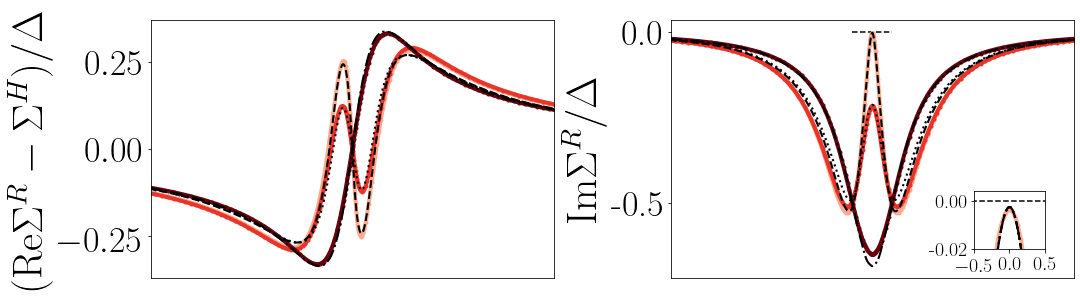

Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813


C:\Users\aguir\OneDrive\Documentos\Master_TMP\Thesis\Keldysh_mfRG\ipynb_scripts\plotting_routines.py:566: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=4)


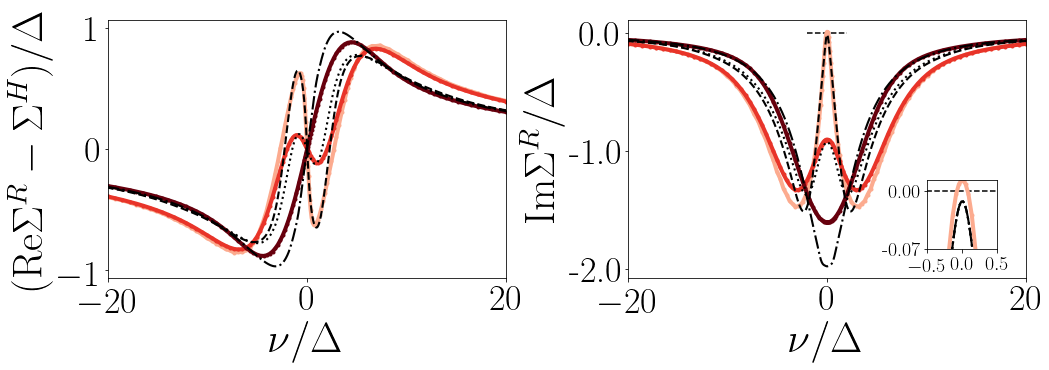

No handles with labels found to put in legend.


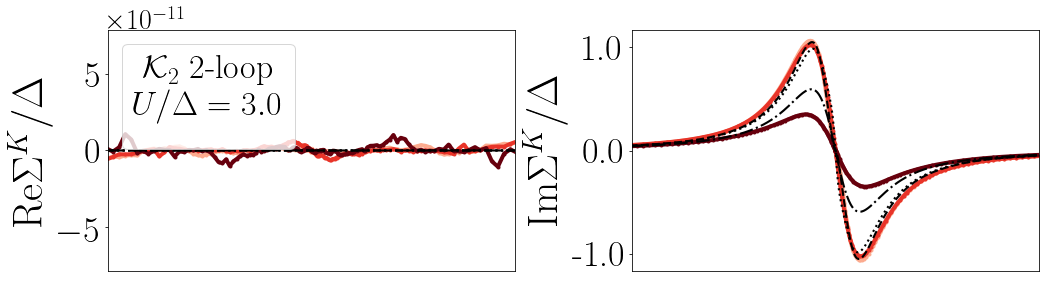

Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813


No handles with labels found to put in legend.


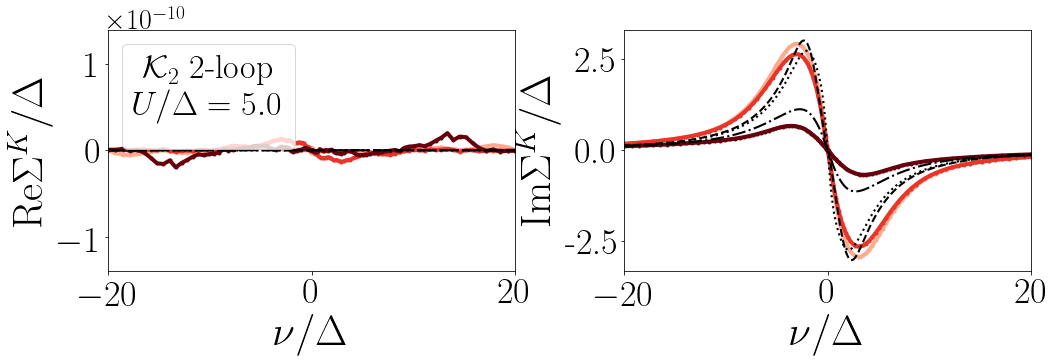

In [3]:
Volt_list = [0.0, 0.1, 1, 5, 10]
Temp_list = [0.01, 0.1, 1]
typ_list =  ["self"] #"A"
run_list = ['K2_2L']
comp = ['R', 'K']

hyb = 1./3.

volt_run = False
temp_run = not(volt_run)

for run in run_list:

    filenames = []
    labels = []
    if volt_run:
        for Volt in Volt_list:
            V_str = "%.2f" % Volt
            if Volt > 1:
                hyb = 0.2
            K1 = generate_filename_fRG(path_fRG, 1,1, Gamma=hyb, V=Volt)
            K1_sf = generate_filename_fRG(path_fRG, 1,1, sf=True, Gamma=hyb, V=Volt)
            K2_1L = generate_filename_fRG(path_fRG, 2,1, Gamma=hyb, V=Volt)
            K2_2L = generate_filename_fRG(path_fRG, 2,2, Gamma=hyb, V=Volt)
            app_dic = {'K1': K1, 'K1_sf': K1_sf, 'K2_1L': K2_1L, 'K2_2L': K2_2L}
            suffix = 'varV.pdf'
            labels.append(r'$'+str(V_str)+'$')
            filenames.append(app_dic[run])
            kind = 'V/U'
    if temp_run:
        for Temp in Temp_list:
            T_str = "%.2f" % Temp
            K1 = generate_filename_fRG(path_fRG, 1,1, T=Temp)
            K1_sf = generate_filename_fRG(path_fRG, 1,1, sf=True, T=Temp)
            K2_1L = generate_filename_fRG(path_fRG, 2,1, T=Temp)
            K2_2L = generate_filename_fRG(path_fRG, 2,2, T=Temp)
            app_dic = {'K1': K1, 'K1_sf': K1_sf, 'K2_1L': K2_1L, 'K2_2L': K2_2L}
            suffix = 'varT.pdf'
            labels.append(' ')#end(r'$'+str(T_str)+'$')
            filenames.append(app_dic[run])
            kind = 'T/U'
    
    print(filenames)
    
    for typ in typ_list:
        for iK in range(2):

            U_list = [1.5, 2.5] #[0.5, 1.5, 2.5] #[0.1, 0.5, 1, 1.5, 2, 2.5]  
            for U_NRG in U_list:
                NRG_info = [U_NRG, path_NRG]
                fig, ax = plot_fRG_V_runs(typ, iK, filenames, NRG_info, labels, run, kind)

                Delta = 0.5
                plt.show()
                figname = run + "_" + typ
                if typ != "A":
                    figname += comp[iK]
        
                figname += str(U_NRG/Delta) + suffix 

                fig.savefig(figname, bbox_inches='tight')